In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import load
from tensorflow import keras
from sklearn.metrics import classification_report, matthews_corrcoef,confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay

In [3]:
test_data = load("../data/processed/test_nn_lin_prob_clus.joblib")
test_data_ensemble = load("../data/processed/test_ensemble.joblib")

## Logistic Regression

In [4]:
model = load("../models/logreg.joblib")

In [5]:
label_predictions = model.predict(test_data["features"])

Classification report

In [6]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.59      0.46      0.52     18264
           1       0.62      0.74      0.68     22249

    accuracy                           0.61     40513
   macro avg       0.61      0.60      0.60     40513
weighted avg       0.61      0.61      0.60     40513



Matthews correlation coeficient

In [7]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.20615271032880783

Confusion matrix

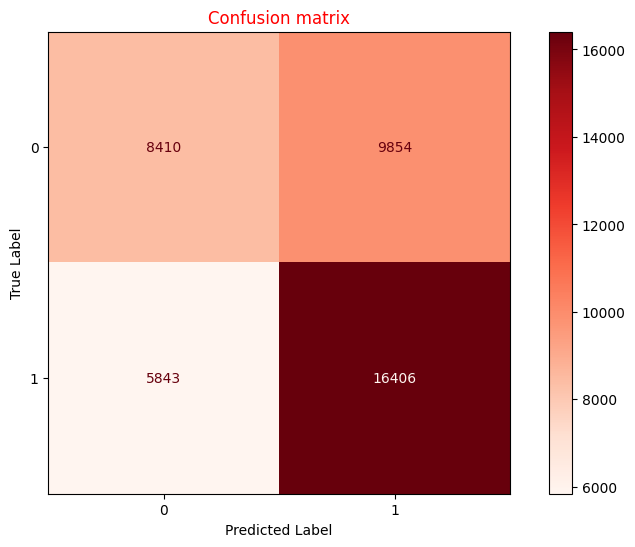

In [8]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

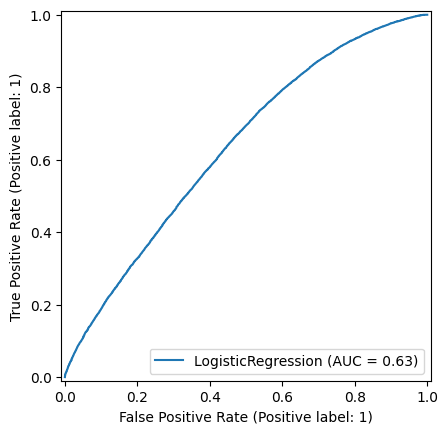

In [9]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Support Vector Machine

In [10]:
model = load("../models/svm.joblib")

In [11]:
label_predictions = model.predict(test_data["features"])

Classification report

In [12]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.64      0.34      0.45     18264
           1       0.61      0.84      0.71     22249

    accuracy                           0.62     40513
   macro avg       0.63      0.59      0.58     40513
weighted avg       0.62      0.62      0.59     40513



Matthews correlation coeficient

In [13]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.21667461555631992

Confusion matrix

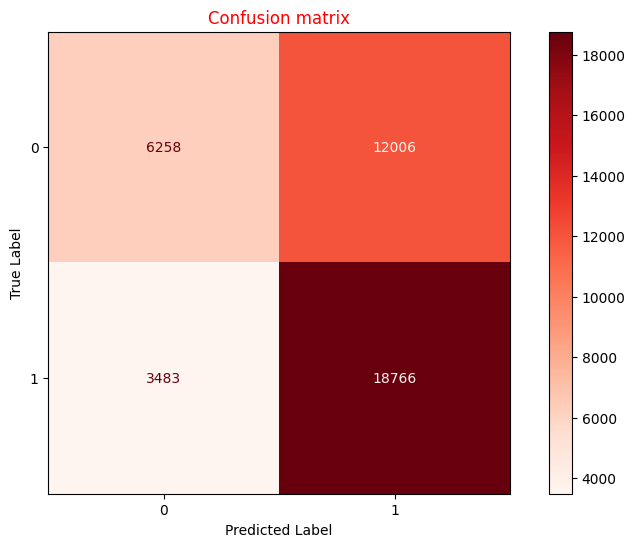

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

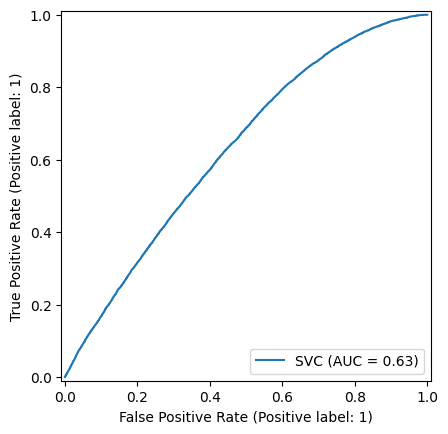

In [15]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Feedforward Neural Network with ReLu Activation

In [16]:
model = keras.models.load_model("../models/nn_relu.keras")

In [17]:
label_predictions = model.predict(test_data["features"])
label_predictions[label_predictions <= 0.5] = 0
label_predictions[label_predictions > 0.5] = 1

1267/1267 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step


Classification report

In [18]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.61      0.32      0.42     18264
           1       0.60      0.83      0.69     22249

    accuracy                           0.60     40513
   macro avg       0.60      0.57      0.56     40513
weighted avg       0.60      0.60      0.57     40513



Matthews correlation coeficient

In [19]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.17448874291598723

Confusion matrix

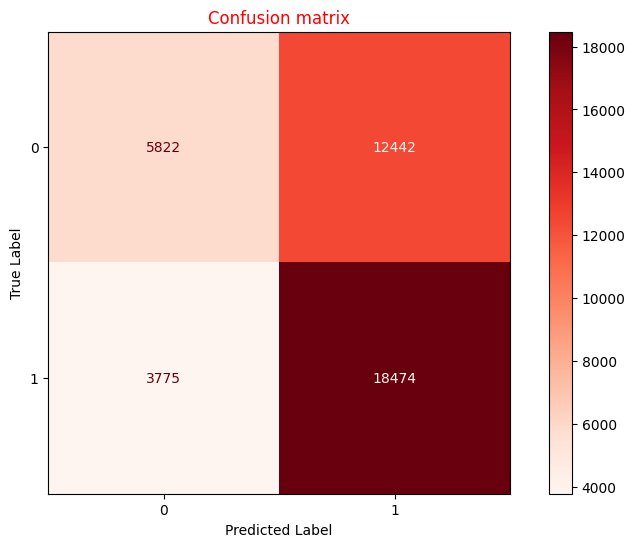

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

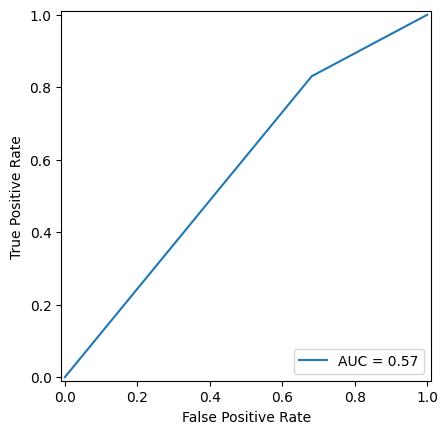

In [21]:
fpr, tpr, tresholds = roc_curve(test_data["labels"], label_predictions)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(test_data["labels"], label_predictions))
disp.plot();

## Feedforward Neural Network with Sigmoid Activation

In [22]:
model = keras.models.load_model("../models/nn_sigmoid.keras")

In [23]:
label_predictions = model.predict(test_data["features"])
label_predictions[label_predictions <= 0.5] = 0
label_predictions[label_predictions > 0.5] = 1

1267/1267 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step


Classification report

In [24]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     18264
           1       0.55      1.00      0.71     22249

    accuracy                           0.55     40513
   macro avg       0.27      0.50      0.35     40513
weighted avg       0.30      0.55      0.39     40513



Matthews correlation coeficient

In [25]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.0

Confusion matrix

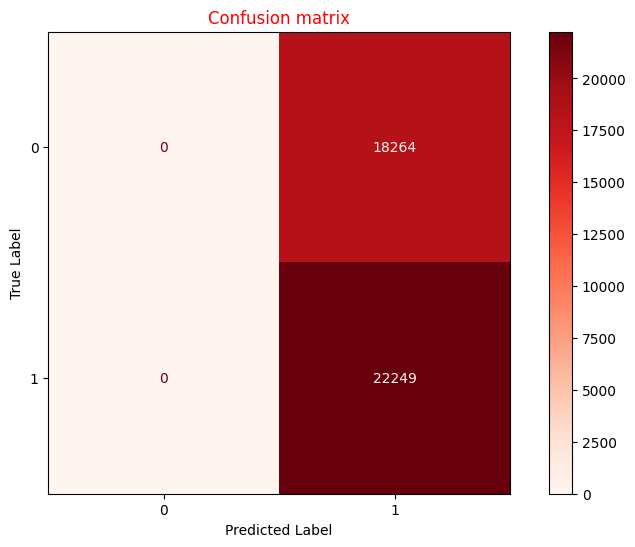

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

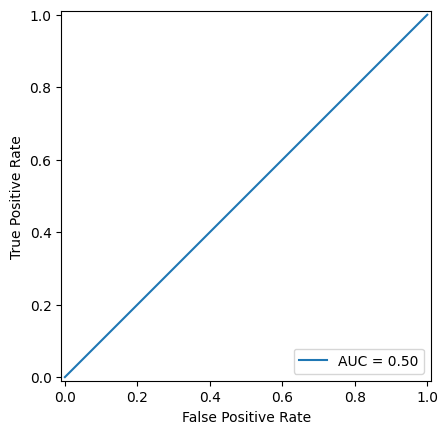

In [27]:
fpr, tpr, tresholds = roc_curve(test_data["labels"], label_predictions)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(test_data["labels"], label_predictions))
disp.plot();

## Multinomial Naive Bayes

In [28]:
model = load("../models/multinomialnb.joblib")

In [29]:
label_predictions = model.predict(test_data["features"])

Classification report

In [30]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     18264
           1       0.55      1.00      0.71     22249

    accuracy                           0.55     40513
   macro avg       0.27      0.50      0.35     40513
weighted avg       0.30      0.55      0.39     40513



Matthews correlation coeficient

In [31]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.0

Confusion matrix

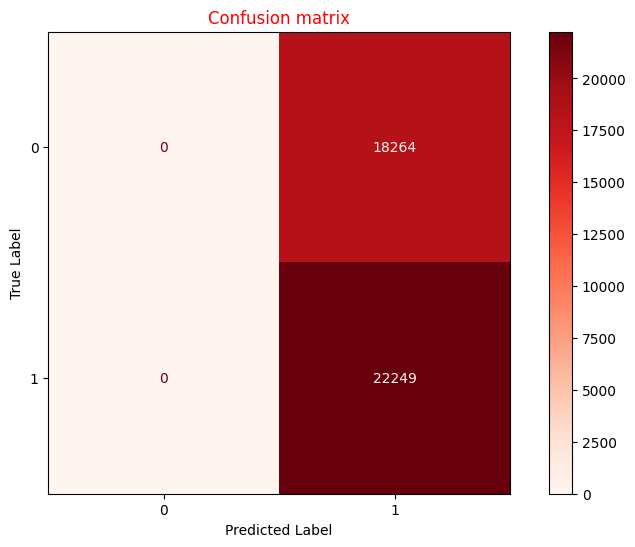

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

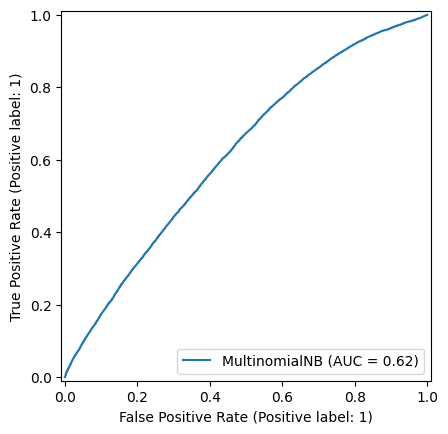

In [33]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Random Forest

In [34]:
model = load("../models/randomforest.joblib")

In [35]:
label_predictions = model.predict(test_data_ensemble["features"])

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s


Classification report

In [36]:
print(classification_report(test_data_ensemble["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.67      0.32      0.43     18264
           1       0.61      0.87      0.72     22249

    accuracy                           0.62     40513
   macro avg       0.64      0.59      0.57     40513
weighted avg       0.63      0.62      0.59     40513



Matthews correlation coeficient

In [37]:
matthews_corrcoef(test_data_ensemble["labels"], label_predictions)

0.22639567873168606

Confusion matrix

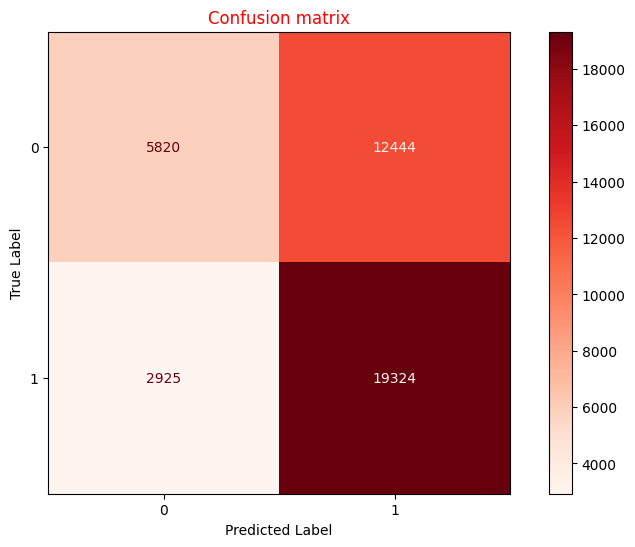

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data_ensemble["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s


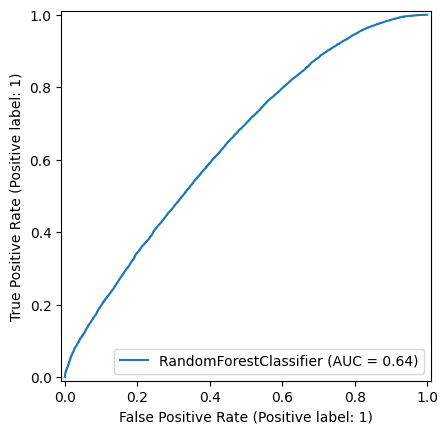

In [39]:
RocCurveDisplay.from_estimator(model, test_data_ensemble["features"], test_data_ensemble["labels"]);

Feature importance

<Axes: xlabel='feature'>

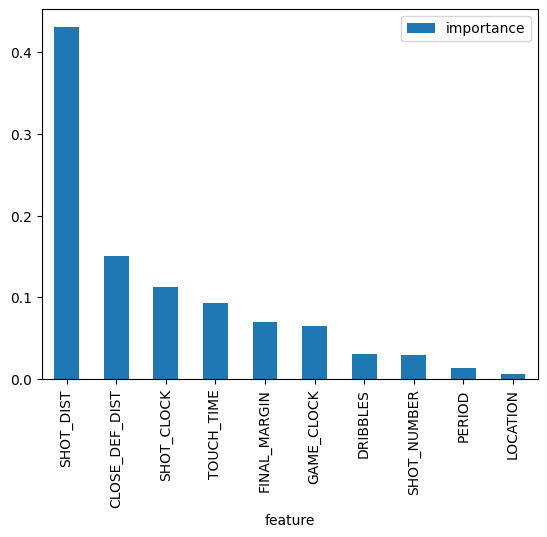

In [41]:
importances = pd.DataFrame({'feature': test_data_ensemble['features'].columns, 'importance': np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

## XGBoost

In [42]:
model = load("../models/xgboost.joblib")

In [43]:
label_predictions = model.predict(test_data_ensemble["features"])

Classification report

In [44]:
print(classification_report(test_data_ensemble["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     18264
           1       0.55      1.00      0.71     22249

    accuracy                           0.55     40513
   macro avg       0.27      0.50      0.35     40513
weighted avg       0.30      0.55      0.39     40513



Matthews correlation coeficient

In [45]:
matthews_corrcoef(test_data_ensemble["labels"], label_predictions)

0.0

Confusion matrix

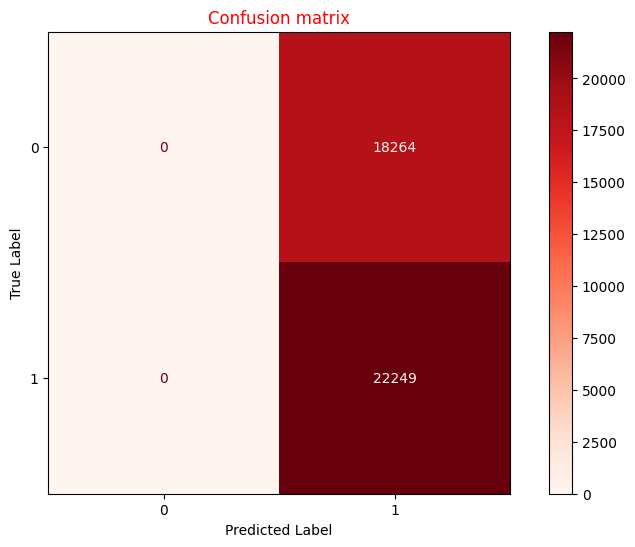

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data_ensemble["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

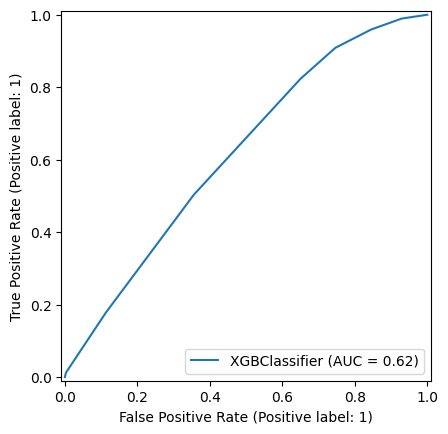

In [47]:
RocCurveDisplay.from_estimator(model, test_data_ensemble["features"], test_data_ensemble["labels"]);

## SGD Classifier - Logistic Regression

In [48]:
model = load("../models/sgdlogreg.joblib")

In [49]:
label_predictions = model.predict(test_data["features"])

Classification report

In [50]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.59      0.43      0.50     18264
           1       0.62      0.76      0.68     22249

    accuracy                           0.61     40513
   macro avg       0.61      0.59      0.59     40513
weighted avg       0.61      0.61      0.60     40513



Matthews correlation coeficient

In [51]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.19985391792011337

Confusion matrix

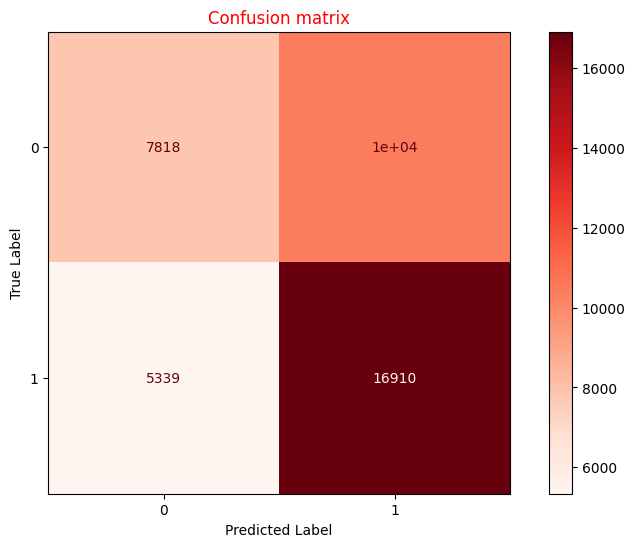

In [52]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

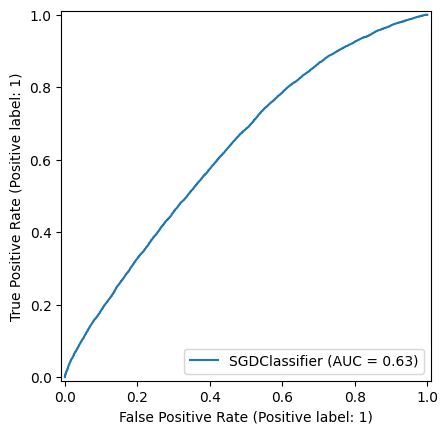

In [53]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## SGD Classifier - Support Vector Machine

In [54]:
model = load("../models/sgdsvm.joblib")

In [55]:
label_predictions = model.predict(test_data["features"])

Classification report

In [56]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.57      0.47      0.52     18264
           1       0.62      0.72      0.66     22249

    accuracy                           0.60     40513
   macro avg       0.60      0.59      0.59     40513
weighted avg       0.60      0.60      0.60     40513



Matthews correlation coeficient

In [57]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.1897450679041447

Confusion matrix

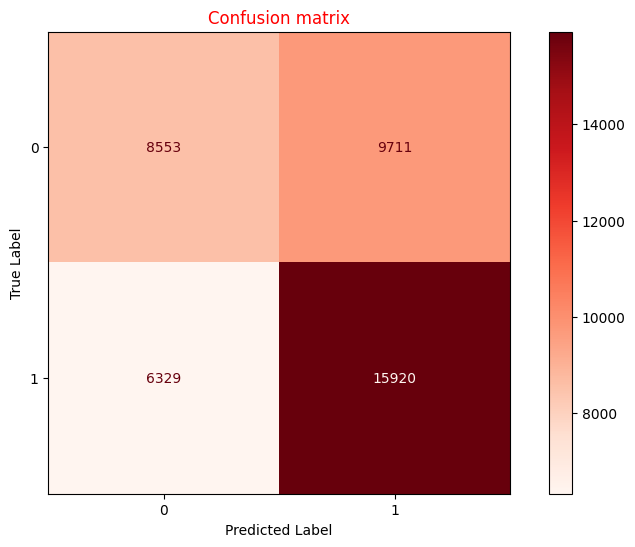

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

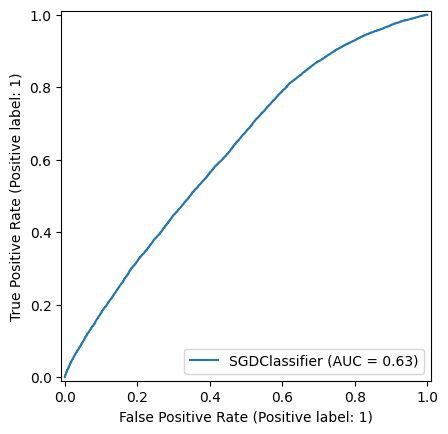

In [59]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## LightGBM

In [60]:
model = load("../models/lightgbm.joblib")

In [61]:
label_predictions = model.predict(test_data_ensemble["features"])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


Classification report

In [62]:
print(classification_report(test_data_ensemble["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     18264
           1       0.55      1.00      0.71     22249

    accuracy                           0.55     40513
   macro avg       0.27      0.50      0.35     40513
weighted avg       0.30      0.55      0.39     40513



Matthews correlation coeficient

In [63]:
matthews_corrcoef(test_data_ensemble["labels"], label_predictions)

0.0

Confusion matrix

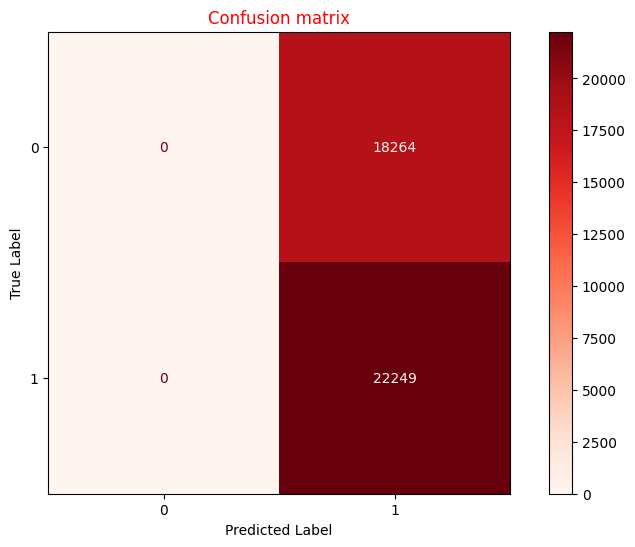

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data_ensemble["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


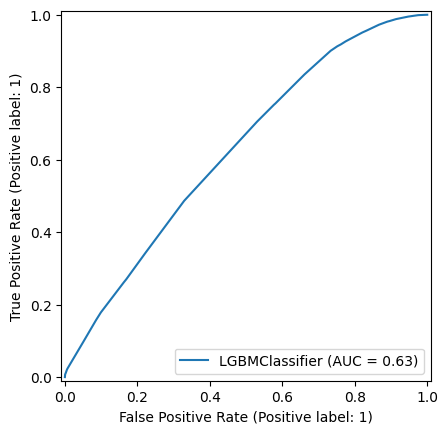

In [65]:
RocCurveDisplay.from_estimator(model, test_data_ensemble["features"], test_data_ensemble["labels"]);

## KNN Classifier

In [66]:
model = load("../models/knnclf.joblib")

In [67]:
label_predictions = model.predict(test_data["features"])

Classification report

In [68]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.54      0.44      0.48     18264
           1       0.60      0.70      0.65     22249

    accuracy                           0.58     40513
   macro avg       0.57      0.57      0.57     40513
weighted avg       0.58      0.58      0.57     40513



Matthews correlation coeficient

In [69]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.13969324635014185

Confusion matrix

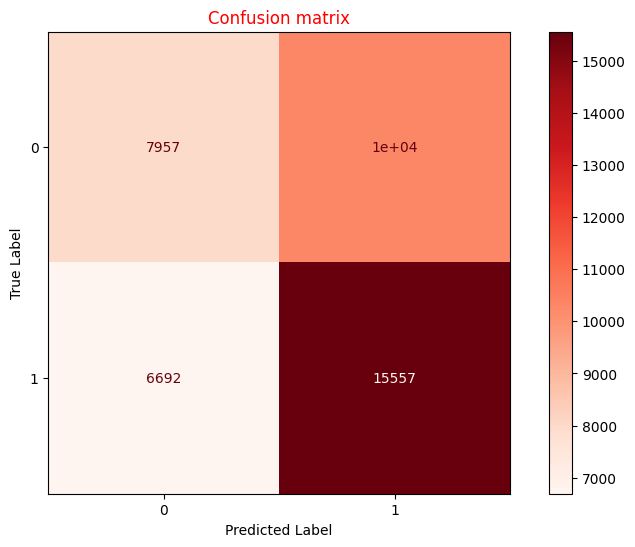

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

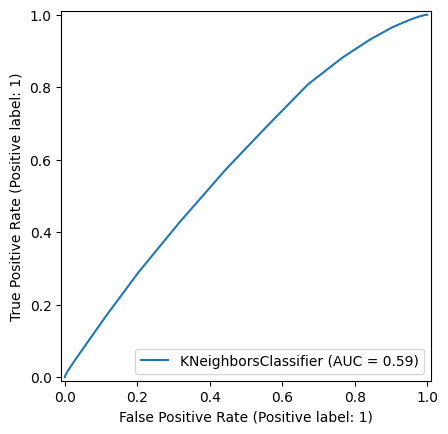

In [71]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## AdaBoost Classifier

In [72]:
model = load("../models/adaboost.joblib")

In [73]:
label_predictions = model.predict(test_data_ensemble["features"])

Classification report

In [74]:
print(classification_report(test_data_ensemble["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.62      0.35      0.45     18264
           1       0.61      0.82      0.70     22249

    accuracy                           0.61     40513
   macro avg       0.61      0.59      0.57     40513
weighted avg       0.61      0.61      0.59     40513



Matthews correlation coeficient

In [75]:
matthews_corrcoef(test_data_ensemble["labels"], label_predictions)

0.19773095487588985

Confusion matrix

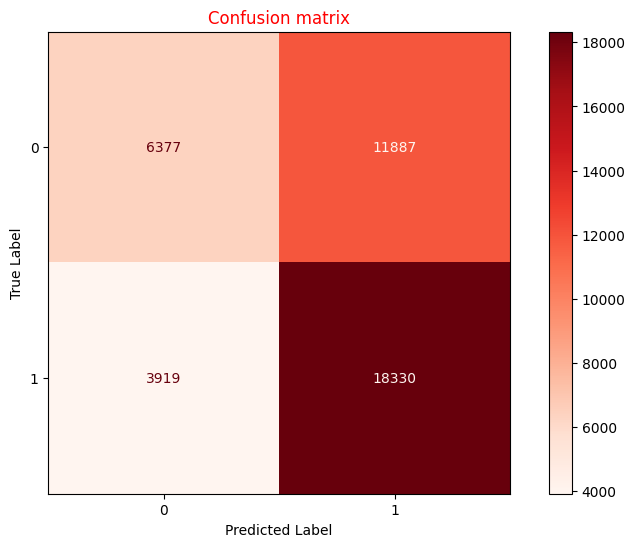

In [76]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data_ensemble["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

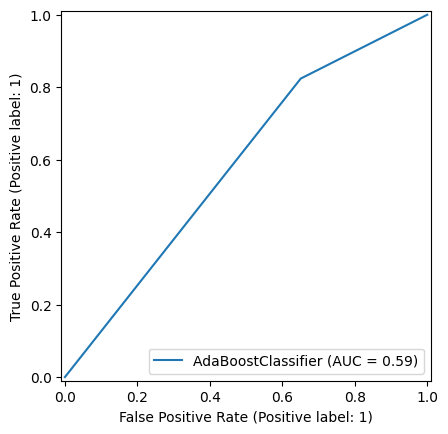

In [77]:
RocCurveDisplay.from_estimator(model, test_data_ensemble["features"], test_data_ensemble["labels"]);